In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Load dataset into a dataframe
data = pd.read_csv("./data/scrapped/laithwaites_listings.csv")
data.head()

,name,Mix Case?,abv,year,size,country,wine_type,price,num_review,rating,url
0,Cabalié 2021,0,13.0,2021,750.0,France,Red Wine,11.99,7475.0,4.5,https://www.laithwaites.co.uk/product/Cabali%C...
1,The Black Stump Durif Shiraz 2021,0,14.5,2021,750.0,Australia,Red Wine,11.99,7445.0,4.5,https://www.laithwaites.co.uk/product/The-Blac...
2,Vinha do Fava Reserva 2020,0,14.5,2020,750.0,Portugal,Red Wine,15.49,544.0,4.5,https://www.laithwaites.co.uk/product/Vinha-do...
3,w/o Organic Frappato 2021,0,13.5,2021,750.0,Italy,Red Wine,11.99,158.0,3.8,https://www.laithwaites.co.uk/product/w/o-Orga...
4,Cabalié (1 Litre Wine Box) 2021,0,13.0,2021,1000.0,France,Red Wine,9.99,14.0,4.8,https://www.laithwaites.co.uk/product/Cabali%C...


In [3]:
# Drop Mix cases because the bottles are already included
data = data[~data['Mix Case?'].astype(bool)].drop('Mix Case?', axis=1)

In [4]:
# Check types of all variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1235
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1195 non-null   object 
 1   abv         1195 non-null   object 
 2   year        1195 non-null   object 
 3   size        1195 non-null   float64
 4   country     1195 non-null   object 
 5   wine_type   1195 non-null   object 
 6   price       864 non-null    float64
 7   num_review  755 non-null    float64
 8   rating      837 non-null    float64
 9   url         1195 non-null   object 
dtypes: float64(4), object(6)
memory usage: 102.7+ KB


In [5]:
# Count NA values
data.isna().sum()

name            0
abv             0
year            0
size            0
country         0
wine_type       0
price         331
num_review    440
rating        358
url             0
dtype: int64

In [6]:
# Check number of unique values in all columns
data.nunique()

name          1192
abv             28
year            36
size            11
country         21
wine_type        6
price           85
num_review     288
rating          29
url           1195
dtype: int64

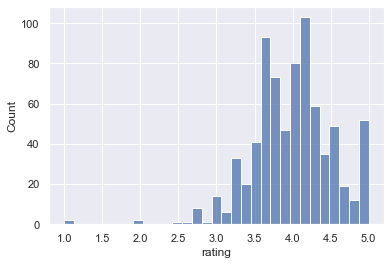

In [7]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0')["rating"])
plt.show()

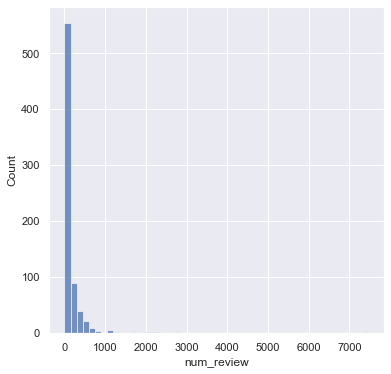

In [8]:
# Histogram plots for number of reviews. There are some extreme values at the end
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0')["num_review"], kde=False, bins=50)
plt.show()

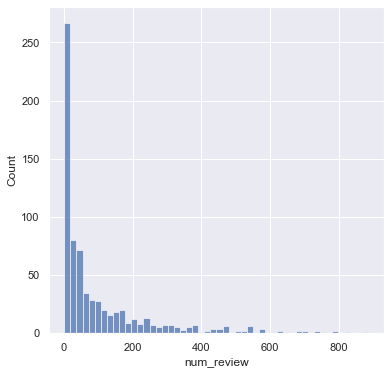

In [9]:
# Histogram plots for number of reviews, without the extreme values. Still very skewed
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data.query('num_review > 0 and num_review < 1000')["num_review"], kde=False, bins=50)
plt.show()

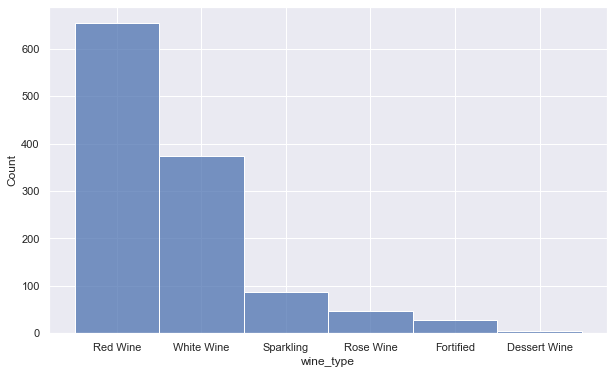

In [10]:
# Histogram plots for wine type
sns.set(rc={"figure.figsize":(10,6)})
sns.histplot(data["wine_type"])
plt.show()

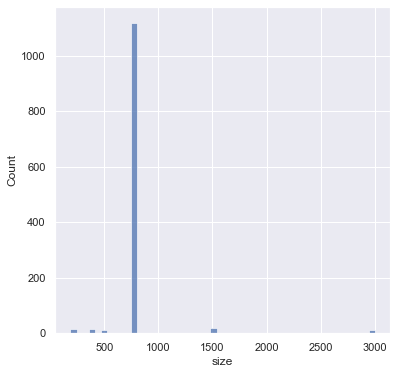

In [11]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(6,6)})
sns.histplot(data["size"], kde=False, bins=50)
plt.show()

In [12]:
# Number of bottles by size. Most are 75 cl.
data.groupby('size').size()

size
187.0       12
200.0        2
375.0       15
500.0       11
750.0     1119
800.0        1
1000.0       2
1125.0       1
1500.0      19
2250.0       2
3000.0      11
dtype: int64

In [13]:
# convert size to cl
data['size'] = data['size'] / 10

In [14]:
# IMPLEMENT THE FIX
# Fix missing countries to unknown value
data["country"].fillna("unknown" , inplace=True)
data["country"].unique()

array(['France', 'Australia', 'Portugal', 'Italy', 'Argentina', 'Spain',
       'Chile', 'Lebanon', 'South Africa', 'USA', 'New Zealand',
       'Moldova', 'Austria', 'Greece', 'Romania', 'Germany', 'Bulgaria',
       'Hungary', 'Croatia', 'Multiple Countries', 'Great Britain'],
      dtype=object)

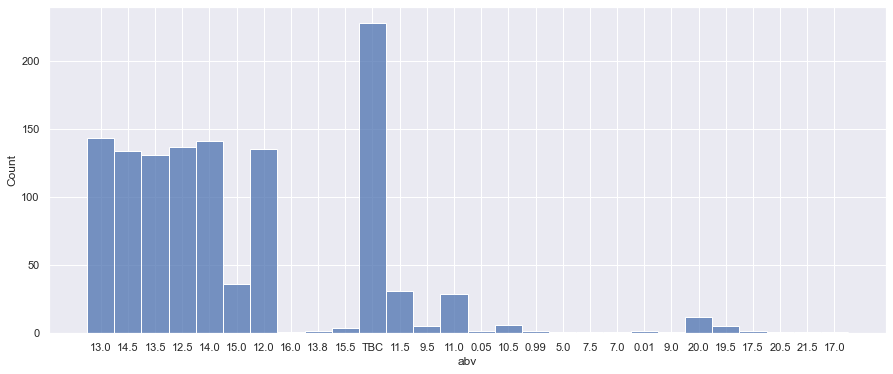

In [15]:
# Histogram plot of ABV
sns.set(rc={"figure.figsize":(15,6)})
sns.histplot(data["abv"], kde=False,bins=50)
plt.show()

In [16]:
# Compute % of missing values
print('Missing pct', (data["abv"] == 'TBC').sum()/len(data["abv"])*100)

Missing pct 19.07949790794979


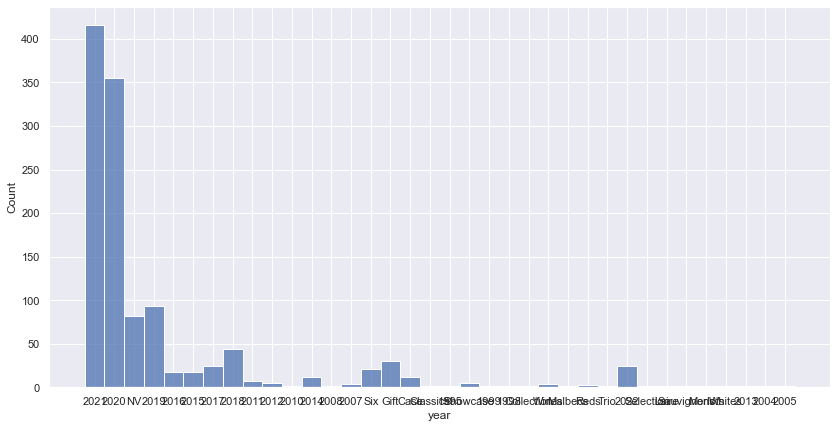

In [17]:
# Histogram plot of year
sns.set(rc={"figure.figsize":(14,7)})
sns.histplot(data["year"], bins=30)
plt.show()

In [18]:
data.groupby(['year']).size()

year
1995            1
1998            1
1999            1
2004            1
2005            1
2007            4
2008            1
2010            1
2011            7
2012            5
2013            2
2014           12
2015           17
2016           17
2017           24
2018           44
2019           93
2020          355
2021          416
2022           24
Case           12
Classics        1
Collection      1
Gift           30
Loire           1
Malbecs         1
Merlots         1
NV             82
Reds            3
Sauvignons      1
Selection       1
Showcase        5
Six            21
Trio            2
Whites          2
Wines           4
dtype: int64

In [19]:
years_to_drop = [
    'Case',
    'Classics',
    'Collection',
    'Gift',
    'Loire',
    'Malbecs',
    'Merlots',
    'Reds',
    'Sauvignons',
    'Selection',
    'Showcase',
    'Six',
    'Trio',
    'Whites',
    'Wines',
    ]
data = data.query('year not in @years_to_drop').reset_index(drop=True)

In [20]:
print('Missing pct', data["year"].isna().sum()/len(data["year"])*100)

Missing pct 0.0


In [21]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

data["countrycode"] = [countries.get(c, "unknown") for c in data["country"]]
data.head()

,name,abv,year,size,country,wine_type,price,num_review,rating,url,countrycode
0,Cabalié 2021,13.0,2021,75.0,France,Red Wine,11.99,7475.0,4.5,https://www.laithwaites.co.uk/product/Cabali%C...,FRA
1,The Black Stump Durif Shiraz 2021,14.5,2021,75.0,Australia,Red Wine,11.99,7445.0,4.5,https://www.laithwaites.co.uk/product/The-Blac...,AUS
2,Vinha do Fava Reserva 2020,14.5,2020,75.0,Portugal,Red Wine,15.49,544.0,4.5,https://www.laithwaites.co.uk/product/Vinha-do...,PRT
3,w/o Organic Frappato 2021,13.5,2021,75.0,Italy,Red Wine,11.99,158.0,3.8,https://www.laithwaites.co.uk/product/w/o-Orga...,ITA
4,Cabalié (1 Litre Wine Box) 2021,13.0,2021,100.0,France,Red Wine,9.99,14.0,4.8,https://www.laithwaites.co.uk/product/Cabali%C...,FRA


In [22]:
# To scale size
for i, size in enumerate(data["size"]):
    data.loc[i, "scaledprice"] = data.loc[i, "price"] * 75 / size

data.loc[data["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
data.loc[:, "logprice"] = np.log10(data.loc[:,"scaledprice"])

<AxesSubplot:>

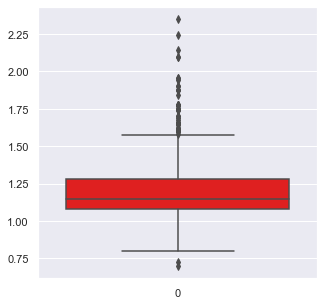

In [23]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(5,5)})

sns.boxplot(data=np.log10(data["scaledprice"]), color= "red")


<AxesSubplot:>

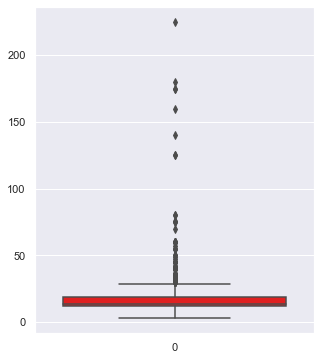

In [24]:
price_dropna = pd.to_numeric(data["price"], errors='coerce')

# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 20000], color= "red")

<AxesSubplot:>

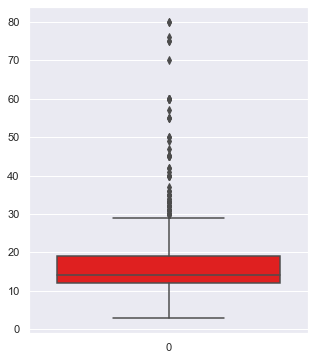

In [25]:
# price visualisation. Remove the single outlier: £26000 bottle
sns.set(rc={"figure.figsize":(5,6)})

sns.boxplot(data=price_dropna[price_dropna < 100], color= "red")


<AxesSubplot:xlabel='Count', ylabel='country'>

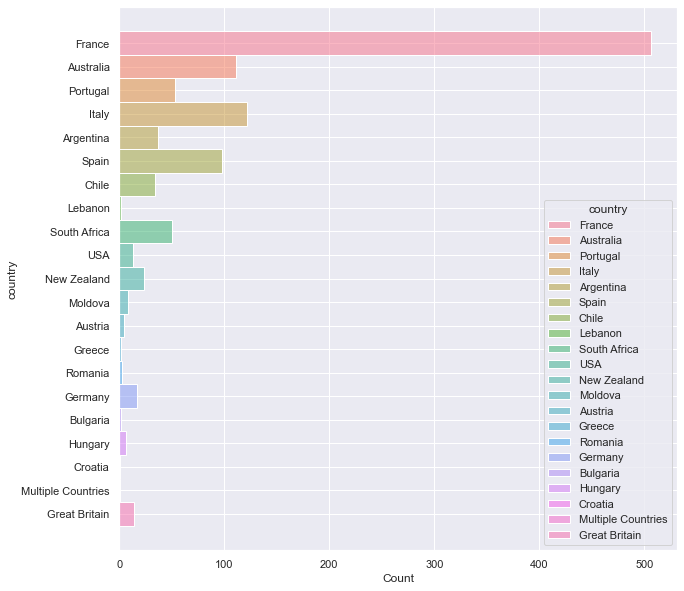

In [26]:
# Countries visualisation
# BREAK DOWN BY WINE TYPE
sns.set(rc={"figure.figsize":(10,10)})
sns.histplot(data=data, y="country", hue="country")

Text(0.5, 1.0, 'Laithwaites Price distribution by wine category - Listed price')

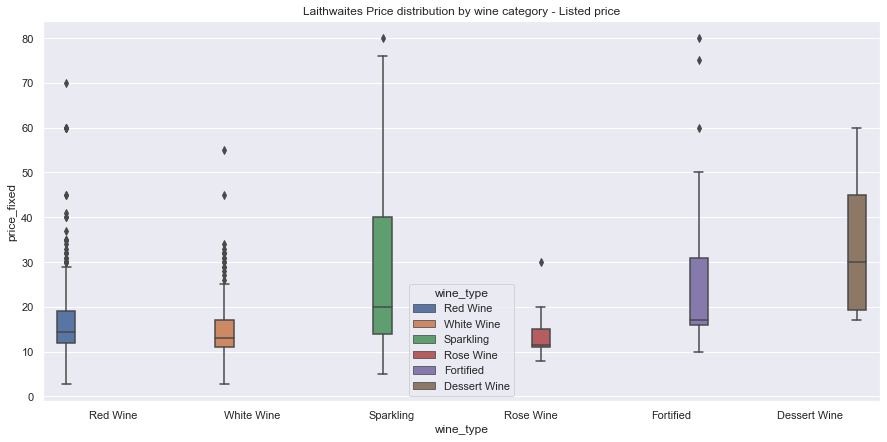

In [27]:
# plot wine type vs abs price
data['price_fixed'] = pd.to_numeric(data['price'], errors='coerce')


sns.set(rc={"figure.figsize":(15,7)})

sns.boxplot(
    data=data.query('price_fixed < 100'),
    x="wine_type", y="price_fixed", hue="wine_type"
)

plt.title('Laithwaites Price distribution by wine category - Listed price')

Text(0.5, 1.0, 'Laithwaites Price distribution by wine category - Log tranformed')

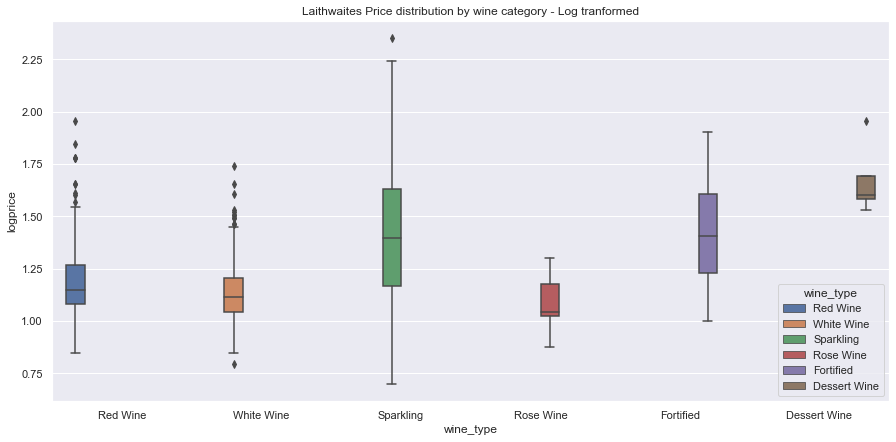

In [28]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(15,7)})

sns.boxplot(
    data=data,
    x="wine_type", y="logprice", hue="wine_type"
)

plt.title('Laithwaites Price distribution by wine category - Log tranformed')

In [29]:
def get_age(year):
    try:
        return 2022 - int(year)
    except:
        return None

# Find age
data.loc[:, "age"] = data['year'].apply(get_age)

# Creating a column with ratings >5
for i, num in enumerate(data["num_review"]):
    if num > 5:
        data.loc[i, "score"] = data.loc[i, "rating"]
    else:
        data.loc[i, "score"] = 0

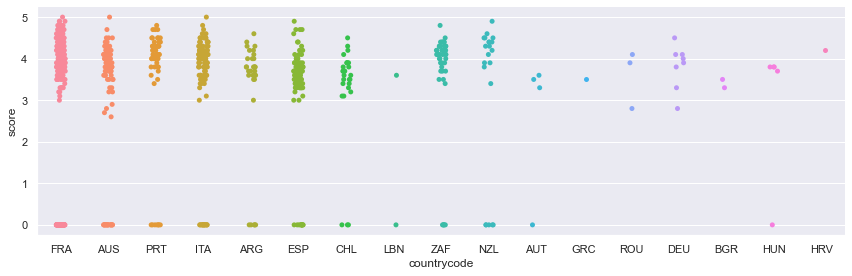

In [30]:
# plot country vs review ratings
sns.catplot(
    data=data.query('num_review > 0').loc[data["countrycode"]!="unknown"], 
    x="countrycode", 
    y="score", 
    height=4, 
    aspect=3,
)

<AxesSubplot:xlabel='age', ylabel='logprice'>

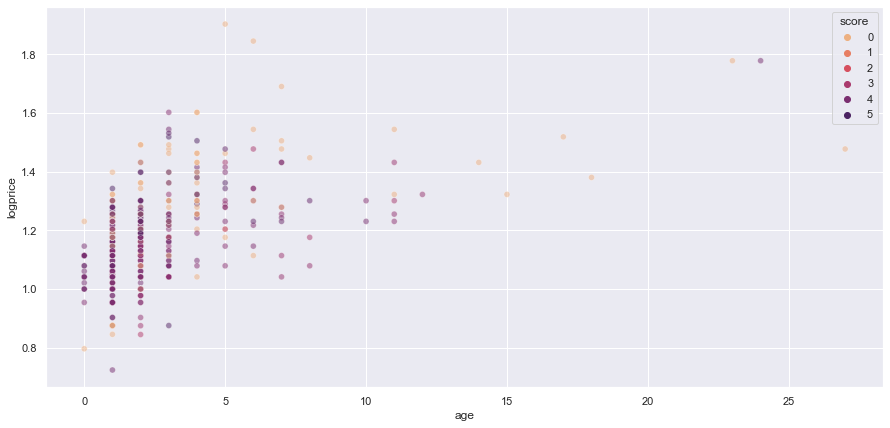

In [31]:
sns.scatterplot(
    data=data.query('num_review > 0'), 
    hue='score', 
    x='age', 
    y='logprice', 
    alpha=.5, 
    palette='flare',
)

Text(0.5, 0, 'LogPrice')

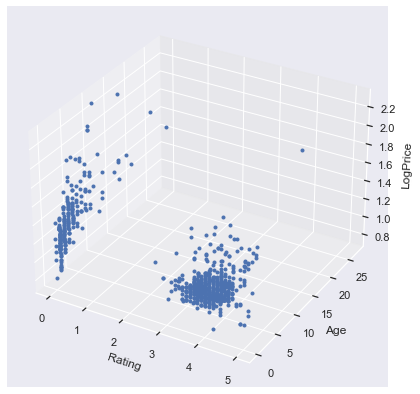

In [32]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(data["score"], data["age"], data["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")

In [33]:
# Plot top 5 frequent years
topyear=data.loc[:, "year"].value_counts().sort_values(ascending=False)
top=topyear.iloc[0:5]
topy =pd.DataFrame({'year':top.index, 'count':top.values})
topy


,year,count
0,2021,416
1,2020,355
2,2019,93
3,NV,82
4,2018,44


<AxesSubplot:xlabel='year', ylabel='count'>

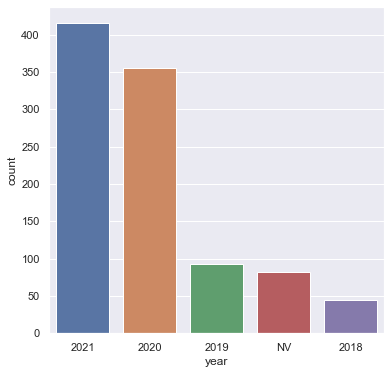

In [34]:
sns.set(rc={"figure.figsize":(6,6)})
sns.barplot(data=topy, x= "year", y = "count")

In [35]:
# Rename the column name for convenience
data.rename(columns={"size" : "size(cL)", "scaledprice" : "scaled_price" }, inplace=True)
data

,name,abv,year,size(cL),country,wine_type,price,num_review,rating,url,countrycode,scaled_price,logprice,price_fixed,age,score
0,Cabalié 2021,13.0,2021,75.0,France,Red Wine,11.99,7475.0,4.5,https://www.laithwaites.co.uk/product/Cabali%C...,FRA,11.9900,1.078819,11.99,1.0,4.5
1,The Black Stump Durif Shiraz 2021,14.5,2021,75.0,Australia,Red Wine,11.99,7445.0,4.5,https://www.laithwaites.co.uk/product/The-Blac...,AUS,11.9900,1.078819,11.99,1.0,4.5
2,Vinha do Fava Reserva 2020,14.5,2020,75.0,Portugal,Red Wine,15.49,544.0,4.5,https://www.laithwaites.co.uk/product/Vinha-do...,PRT,15.4900,1.190051,15.49,2.0,4.5
3,w/o Organic Frappato 2021,13.5,2021,75.0,Italy,Red Wine,11.99,158.0,3.8,https://www.laithwaites.co.uk/product/w/o-Orga...,ITA,11.9900,1.078819,11.99,1.0,3.8
4,Cabalié (1 Litre Wine Box) 2021,13.0,2021,100.0,France,Red Wine,9.99,14.0,4.8,https://www.laithwaites.co.uk/product/Cabali%C...,FRA,7.4925,0.874627,9.99,1.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,L'Epiphanie de Sauternes (half bottle) 2018,14.5,2018,37.5,France,Dessert Wine,19.99,3.0,5.0,https://www.laithwaites.co.uk/product/L'Epipha...,FRA,39.9800,1.601843,19.99,4.0,0.0
1105,Seifried Estate Sweet Agnes Riesling (half bot...,10.5,2019,37.5,New Zealand,Dessert Wine,16.99,11.0,4.5,https://www.laithwaites.co.uk/product/Seifried...,NZL,33.9800,1.531223,16.99,3.0,4.5
1106,LC Sauternes 2018,14.5,2018,75.0,France,Dessert Wine,40.00,4.0,3.8,https://www.laithwaites.co.uk/product/LC-Saute...,FRA,40.0000,1.602060,40.00,4.0,0.0
1107,Klein Constantia Vin de Constance (50cl) 2018,14.0,2018,50.0,South Africa,Dessert Wine,60.00,NaN,NaN,https://www.laithwaites.co.uk/product/Klein-Co...,ZAF,90.0000,1.954243,60.00,4.0,0.0


In [36]:
data.to_csv("./data/ready to merge/laithwaites_to_merge.csv", index=False)